In [ ]:
---
title: One Way ANOVA
order: 5
---

In [1]:
# import data
library(Sleuth2)
percent = case0502$Percent
judge = case0502$Judge

[1] Spock's Spock's Spock's Spock's Spock's Spock's Spock's Spock's Spock's
[10] A       A       A       A       A       B       B       B       B      
[19] B       B       C       C       C       C       C       C       C      
[28] C       C       D       D       E       E       E       E       E      
[37] E       F       F       F       F       F       F       F       F      
[46] F      
Levels: Spock's A B C D E F

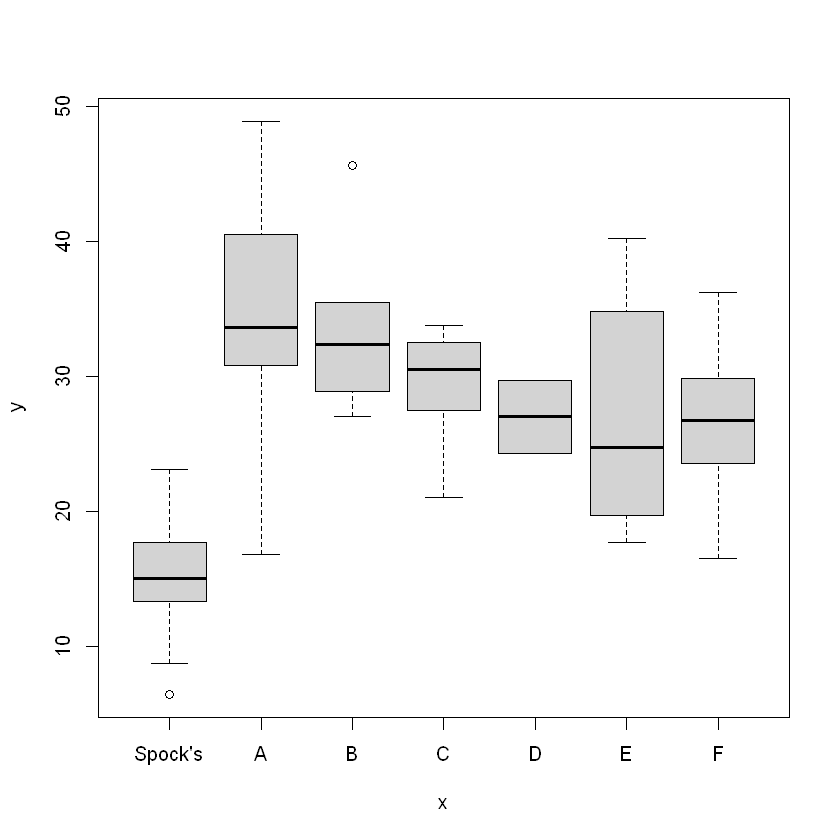

In [2]:
# plot the data
plot(judge, percent)
judge

In [3]:
summary(percent)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.40   19.95   27.50   26.58   32.38   48.90 

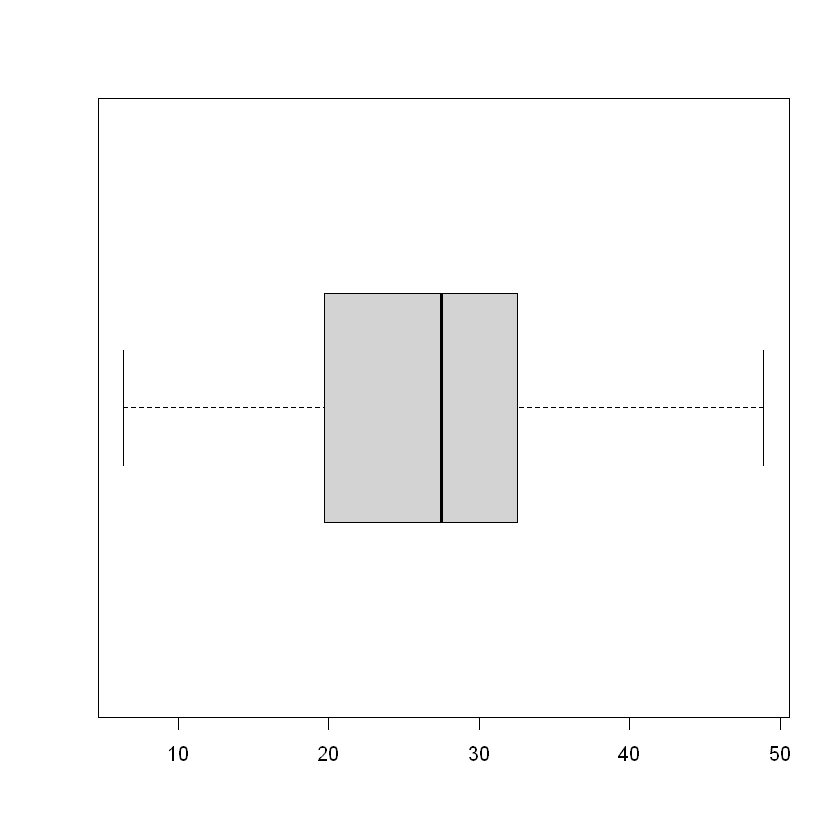

In [4]:
boxplot(percent, horizontal = T)

This looks to be normal, based on Mean vs. Median, and the IQR

In [5]:
t.test(percent, mu = 50)


	One Sample t-test

data:  percent
t = -17.303, df = 45, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 50
95 percent confidence interval:
 23.85675 29.30847
sample estimates:
mean of x 
 26.58261 


## One sample two sided test
hypothesis: $H_0:\mu=50$ <br>
test statistic: $\frac{\bar{X}-\mu_0}{S/\sqrt{n}}\sim T_{n-1}$ <br>
The result is significant, we can reject the hypothesis. 

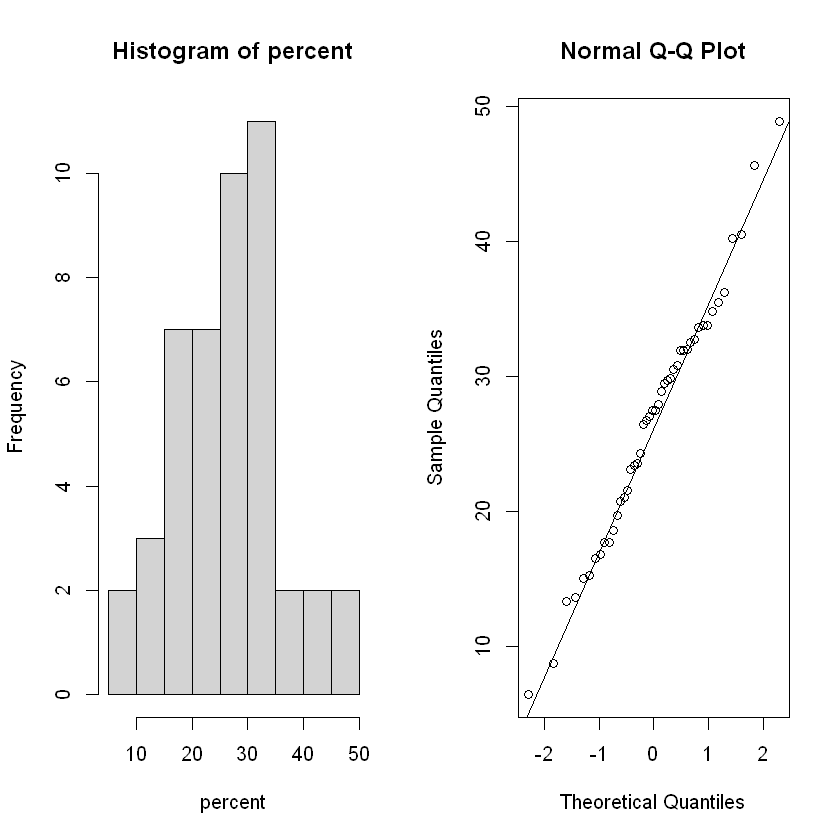

In [6]:
par(mfrow = c(1,2))
hist(percent)
qqnorm(percent)
qqline(percent)

## Normality Check

In [7]:
shapiro.test(percent)


	Shapiro-Wilk normality test

data:  percent
W = 0.98763, p-value = 0.9013


$H_0$: data is normal <br>
Test statistics: 0.98763<br>
Probability: 0.9013 is larger <br>
We have evidence that data is normal.

Consider two-sided t-test

## Two Sample t-test

[1]  6.4  8.7 13.3 13.6 15.0 15.2 17.7 18.6 23.1

[1] 16.8 30.8 33.6 40.5 48.9 27.0 28.9 32.0 32.7 35.5 45.6 21.0 23.4 27.5 27.5
[16] 30.5 31.9 32.5 33.8 33.8 24.3 29.7 17.7 19.7 21.5 27.9 34.8 40.2 16.5 20.7
[31] 23.5 26.4 26.7 29.5 29.8 31.9 36.2

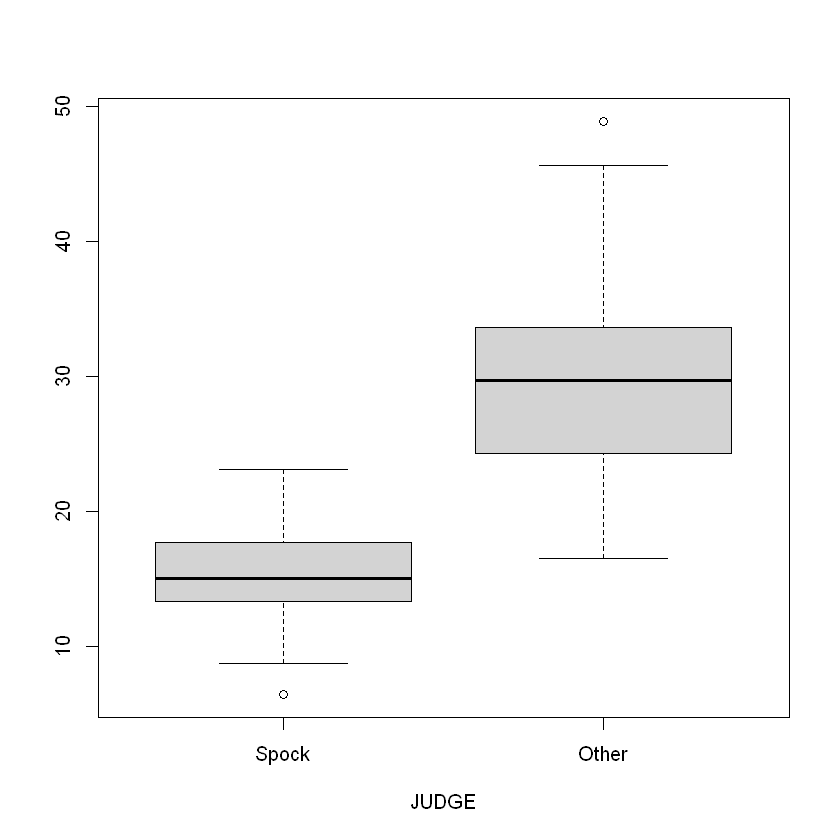

In [8]:
groupS <- percent[judge == "Spock's"]
groupS
groupNS <- percent[judge != "Spock's"]
groupNS
boxplot(groupS, groupNS, xlab="JUDGE", names = c("Spock", "Other"))

**Purpose** to compare two population means <br>
$H_0$: $\mu_x-\mu_y = D_0 (\text{ commonly }D_0=0)$ <br>
**Assumptions** 
- two samples are iid from approximately Normal populations
- Two samples are independent of each other

**Test statistic** $t = \frac{(\bar{x}-\bar{y})-D_0}{se(\bar{x}-\bar{y})}$ <br>
$$ \begin{align*}
var(\bar{x}-\bar{y}) &= var(\bar{x}) + var(-\bar{y}) = \sigma_x^2/n_x + (-1)^2\sigma_y^2/n_y \\
se(\bar{x}-\bar{y}) &= \sqrt{\sigma_x^2/n_x + \sigma_y^2/x_y} 
\end{align*}$$


## Check equal variance assumption

In [9]:
var(groupS)
var(groupNS)
max(var(groupS), var(groupNS)) / min(var(groupS), var(groupNS)) # Rule of Thumb
max(sd(groupS), sd(groupNS)) / min(sd(groupS), sd(groupNS))

[1] 25.38945

[1] 55.21632

[1] 2.174775

[1] 1.474712

Rule of thumb test <br>
$H_0: \sigma_x^2 = \sigma_y^2$ <br>
Test statistic: $S_{max}^2 / S^2_{min} = $ larger sample variance / smaller sample variance. <br>
Reject $H_0$ is test-statistic $ > 4$

## Variance Ratio F-test

In [10]:
var.test(groupS, groupNS)


	F test to compare two variances

data:  groupS and groupNS
F = 0.45982, num df = 8, denom df = 36, p-value = 0.2482
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1789822 1.7739665
sample estimates:
ratio of variances 
         0.4598178 


**Assumptions**
 - Random samples $X_1,X_2$ with size $n_1,n_2$ is drawn from $N(\mu_1,\sigma_1^2), N(\mu_2, \sigma_2^2)$
 - $X_1,X_2$ are independent.
 - Samples size are large (better when samples size are equal)
 
**Test statistic** $F = S_1^2/S_2^2 \sim F_{n_1-1,n_2-1}$ <br>

$p = 0.07668 > 0.05$, we don't reject the null hypothesis, evidence of equal variance

## Two-sample t-test (Satterwaite approximation)

In [11]:
t.test(groupS, groupNS, var.equal = F)


	Welch Two Sample t-test

data:  groupS and groupNS
t = -7.1597, df = 17.608, p-value = 1.303e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -19.23999 -10.49935
sample estimates:
mean of x mean of y 
 14.62222  29.49189 


Used when population variance can't be assume to be equal <br>
**Test statistic** $t = \frac{(\bar{x}-\bar{y}-D_0)}{\sqrt{s^2_x/n_x + s_y^2/n_y}}\sim t_v$, $v = \frac{(s^2_x/n_x + s_y^2/n_y)^2}{(s_x^2/n_x)^2/(n_x-1) + (s_y^2/n_y)^2/(n_y-1)}$. $v$ is calculated by Satterhwaite approximation, round down to the nearest integer

## Pooled two-sample t-test

In [12]:
t.test(groupS, groupNS, var.equal = T)


	Two Sample t-test

data:  groupS and groupNS
t = -5.6697, df = 44, p-value = 1.03e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -20.155294  -9.584045
sample estimates:
mean of x mean of y 
 14.62222  29.49189 


**Assumption** population variance are equal <br>
Estimate pooled variance $s_p^2 = \frac{(n_x-1)^2 s_x^2 + (n_y-1)^2 s_y^2}{n_x+n_y-2}$ <br>
**Test statistic** $t = \frac{(\bar{x}-\bar{y})-D_0}{\sqrt{s_p^2(n_x^{-1}+n_y^{-1})}}\sim t_{n_x+n_y-2}$

Based on the tests, we can reject the hypothesis that two samples have the same means<br>
**Conclusion** Evidence that the percentage of women differs in the two groups

**Paired t-test** <br>
**Requirement** $n_x = n_y$, independent samples

## Pooled t-test (Left tailed)
$H_0: \mu_x - \mu_y = 0, H_a: \mu_x < \mu_y$

In [13]:
t.test(groupS, groupNS, alternative="less", var.equal= T)


	Two Sample t-test

data:  groupS and groupNS
t = -5.6697, df = 44, p-value = 5.148e-07
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
    -Inf -10.463
sample estimates:
mean of x mean of y 
 14.62222  29.49189 


# Dummy Variable (SLR)


In [14]:
X <- c(rep(1, length(groupS)), rep(0, length(groupNS)))
model <- lm(percent~X)
summary(model)


Call:
lm(formula = percent ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.9919  -4.6669   0.2581   3.7854  19.4081 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   29.492      1.160   25.42  < 2e-16 ***
X            -14.870      2.623   -5.67 1.03e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.056 on 44 degrees of freedom
Multiple R-squared:  0.4222,	Adjusted R-squared:  0.409 
F-statistic: 32.15 on 1 and 44 DF,  p-value: 1.03e-06


**Model** $Y_i=\beta_0+\beta_1X_i+\epsilon_i$, where $X_i=\mathbb{I}(\text{ith observation is from group A})$.<br>
**Assumptions**
 - The linear model is appropriate
 - Gauss-Markov assumptions ($E(\epsilon_i)=0, var(\epsilon_i)=\sigma^2$: Uncorrelated errors)
 - $\epsilon_i\sim N(0, \sigma^2)$

$H_0:\beta_1 = 0$ <br>
**Test statistic** $t = \frac{b_1}{se(b_1)}\sim t_{N-2}$, $N = n_A + n_{A^c} $

## Regression diagnostics

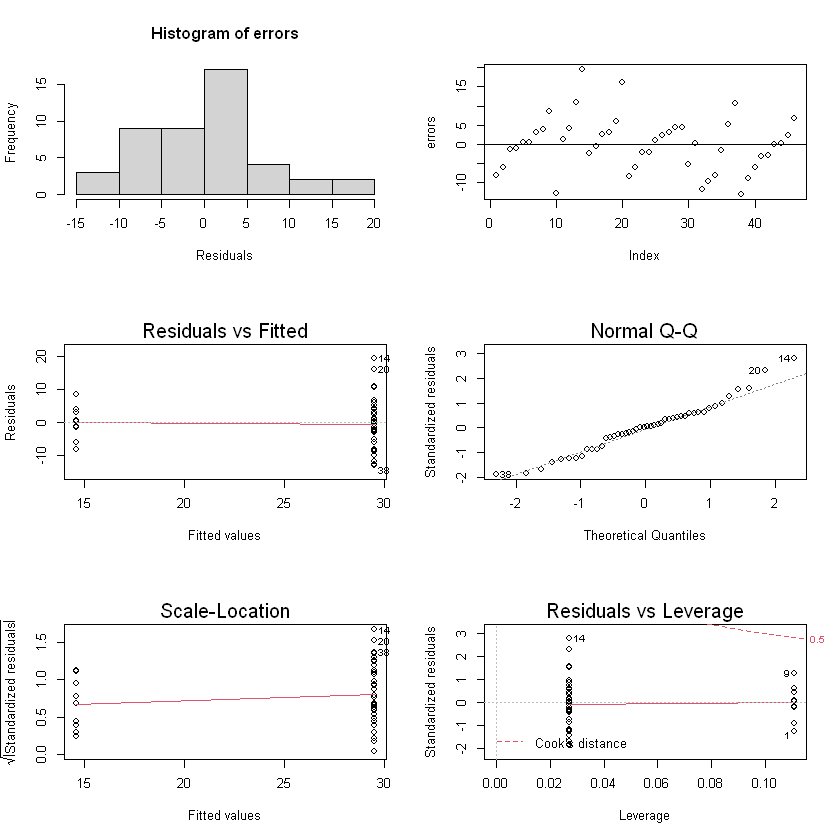

In [15]:
yhats = fitted(model)
errors = residuals(model)
par(mfrow=c(3,2))

hist(errors, xlab="Residuals", breaks = 5)

plot(errors)
abline(0, 0)

plot(model)

Check Assumptions
- Normality: looks like a little bit right skewed (but they might just be outliers)
- Constant variance: yes
- $E(\epsilon) = 0$: yes

In [16]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,1600.623,1600.62290,32.14538,1.029666e-06
Residuals,44,2190.903,49.79325,NA,NA


#### ANOVA for linear regression
$H_0:\beta_1 = 0$ <br>
$F=MSR/MSE\sim F_{d.f.variables,\: d.f.errors}$